In [30]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.base import clone
from cross_val import *
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import svm
import random
from sklearn.decomposition import PCA

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
def plotNumbers(X, y, text = 'label: ', n_rows = 1, figsize=(10, 3)):
    _, axes = plt.subplots(nrows=n_rows, ncols=int(len(y)/n_rows), figsize=figsize)

    for ax, image, label in zip(axes.reshape(-1), X, y):
        ax.set_axis_off()
        ax.imshow(image.reshape((28, 28)), cmap=plt.cm.gray_r, interpolation="nearest")
        ax.set_title(text + "%s" % str(label))

def invert(data):
    for d in data:
        d[:] = 255 - d[:]

In [25]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

invert(X)

In [27]:
indices = np.where((y == '1') | (y == '7'))[0]

y_bin = y[indices]
X_bin = X[indices]

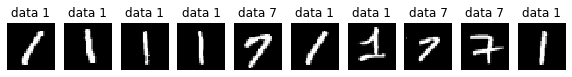

In [59]:
plotNumbers(X_bin[:10], y_bin[:10], 'data ')

In [29]:
X_train, X_val, y_train, y_val = train_test_split(X_bin, y_bin, test_size=5000)

In [31]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

pca = PCA(n_components = 0.9)
pca.fit(X_train_scaled)

X_train_pca = pca.transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)

In [68]:
clf = svm.LinearSVC(tol=1e-5)
clf.fit(X_train_pca, y_train)

C:\Users\user2\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(tol=1e-05)

In [69]:
Z = clf.predict(X_val_pca)
accuracy = accuracy_score(y_val, Z)
print("Classifier performance %.4f" %  accuracy)

Classifier performance 0.9906


In [71]:
decision_function = np.dot(X_train_pca, clf.coef_[0]) + clf.intercept_[0]#clf.decision_function(X_train_pca)
support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]

support_vectors = X_train[support_vector_indices]
support_vectors_y = y_train[support_vector_indices]
print(support_vectors.shape)

(172, 784)


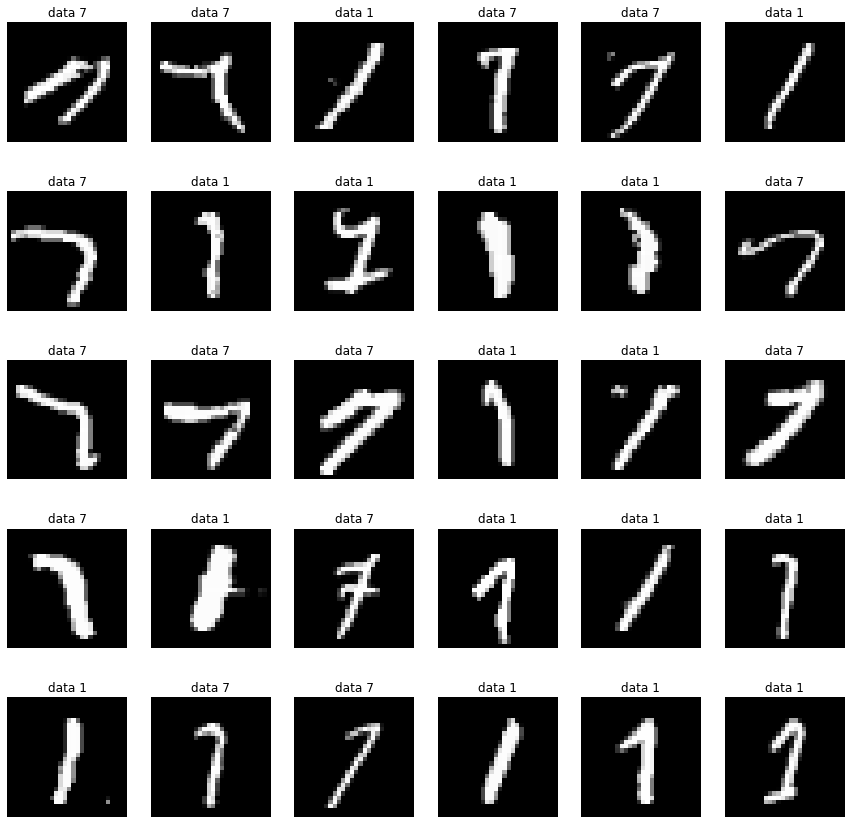

In [72]:
plotNumbers(support_vectors[:30], support_vectors_y[:30], 'data ' , 5, (15, 15))

# TSNE

In [63]:
support_X = X_train_pca[clf.support_]
support_y = y_train[clf.support_]

In [64]:
from sklearn.manifold import TSNE
x_emb = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X_train_pca)

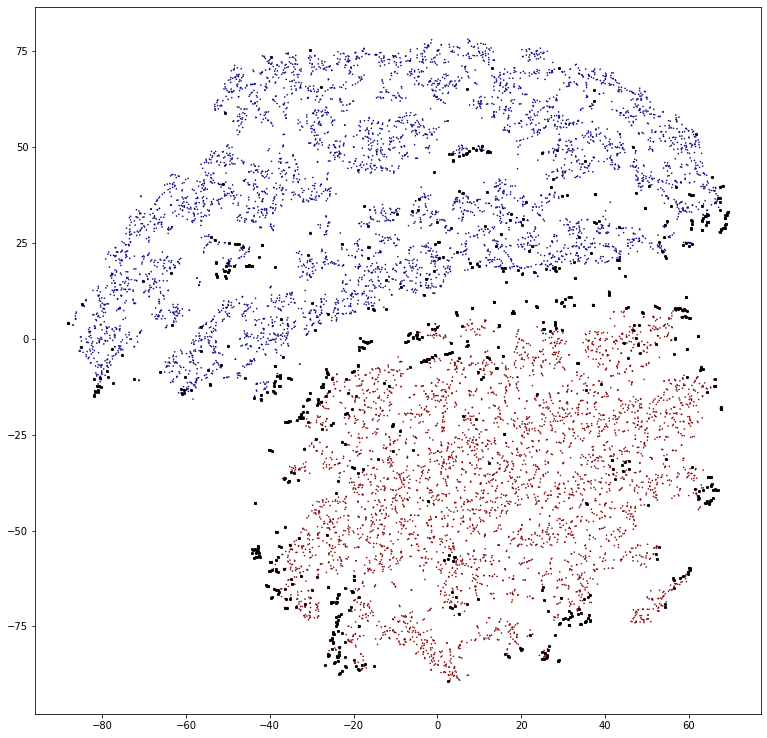

In [65]:
plt.rcParams['figure.figsize'] = 13, 13

norm = plt.Normalize()

colors = plt.cm.jet(norm(np.int0(y_train)))

min_y = y_train.min()
max_y = y_train.max()

plt.scatter(x_emb[:, 0], x_emb[:, 1], s = 0.35, c = colors)
plt.scatter(x_emb[clf.support_, 0], x_emb[clf.support_, 1], s = 4.9, c = 'black', marker='x')